In [21]:
import os
import requests
import pandas as pd
from dotenv import load_dotenv

import alpaca_trade_api as tradeapi
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from pandas.tseries.offsets import DateOffset
from sklearn.metrics import classification_report
%matplotlib inline

In [2]:
load_dotenv()

True

In [3]:
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
alpaca = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version='v2')

In [4]:
today = pd.Timestamp('2023-06-29', tz='America/New_York').isoformat()
today

'2023-06-29T00:00:00-04:00'

In [5]:
tickers=["IWV", "IWB", "IWF", "IWD", "IWM", "IWO", "IWN"]

In [8]:
timeframe = "1Day"
start = pd.Timestamp('2019-07-14', tz='America/New_York').isoformat()
end = pd.Timestamp('2020-07-14', tz='America/New_York').isoformat()

In [9]:
portfolio_df_year = alpaca.get_bars(tickers, timeframe, start=start, end=end).df
portfolio_df_year.tail(10)

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2020-06-30 04:00:00+00:00,177.28,180.89,177.2700,180.06,310674,2483,179.380146,IWV
2020-07-01 04:00:00+00:00,180.53,181.84,180.2200,180.98,280723,2167,181.198918,IWV
2020-07-02 04:00:00+00:00,183.29,184.19,181.6600,181.93,149588,1287,182.770857,IWV
2020-07-06 04:00:00+00:00,184.53,185.17,184.0100,184.76,302582,2096,184.532629,IWV
2020-07-07 04:00:00+00:00,183.85,185.14,182.6700,182.78,150832,1358,184.013413,IWV
2020-07-08 04:00:00+00:00,183.40,184.42,182.3400,184.30,342080,2276,183.784628,IWV
2020-07-09 04:00:00+00:00,184.75,184.92,181.0200,183.18,238349,1851,182.998590,IWV
2020-07-10 04:00:00+00:00,183.05,185.28,182.3699,185.13,134397,1296,184.055541,IWV
2020-07-13 04:00:00+00:00,186.52,188.23,182.8600,183.07,240228,1987,185.584792,IWV


In [10]:
IWV=portfolio_df_year[portfolio_df_year['symbol']=='IWV'].drop('symbol', axis=1)
IWB=portfolio_df_year[portfolio_df_year['symbol']=='IWB'].drop('symbol', axis=1)
IWF=portfolio_df_year[portfolio_df_year['symbol']=='IWF'].drop('symbol', axis=1)
IWD=portfolio_df_year[portfolio_df_year['symbol']=='IWD'].drop('symbol', axis=1)
IWM=portfolio_df_year[portfolio_df_year['symbol']=='IWM'].drop('symbol', axis=1)
IWO=portfolio_df_year[portfolio_df_year['symbol']=='IWO'].drop('symbol', axis=1)
IWN=portfolio_df_year[portfolio_df_year['symbol']=='IWN'].drop('symbol', axis=1)
display(IWV.head())
display(IWB.head())
display(IWF.head())
display(IWD.head())
display(IWM.head())
display(IWO.head())
display(IWN.head())

,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2019-07-15 04:00:00+00:00,176.83,176.8500,176.2800,176.63,238373,1403,176.464251
2019-07-16 04:00:00+00:00,176.53,176.7091,175.9000,176.09,115545,743,176.191883
2019-07-17 04:00:00+00:00,176.09,176.1300,174.9400,174.94,95005,805,175.518579
2019-07-18 04:00:00+00:00,174.60,175.8000,174.4069,175.61,149988,1037,175.270109
2019-07-19 04:00:00+00:00,176.12,176.2183,174.5300,174.53,126205,1153,175.329881


,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2019-07-15 04:00:00+00:00,167.32,167.46,166.85,167.18,757635,5335,167.036590
2019-07-16 04:00:00+00:00,167.11,167.21,166.42,166.63,1043679,7910,166.736478
2019-07-17 04:00:00+00:00,166.60,166.88,165.52,165.52,578097,4071,166.114306
2019-07-18 04:00:00+00:00,165.24,166.36,165.01,166.19,671214,4051,165.594816
2019-07-19 04:00:00+00:00,166.87,166.87,165.13,165.22,505351,3696,165.861819


,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2019-07-15 04:00:00+00:00,163.28,163.69,162.900,163.28,1749942,11124,163.126117
2019-07-16 04:00:00+00:00,163.25,163.38,162.400,162.68,765871,8398,162.835240
2019-07-17 04:00:00+00:00,162.82,162.95,161.870,161.87,917000,6871,162.283099
2019-07-18 04:00:00+00:00,161.37,162.43,160.945,162.17,804776,8929,161.763189
2019-07-19 04:00:00+00:00,163.18,163.18,160.935,161.04,1688382,12851,161.613686


,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2019-07-15 04:00:00+00:00,129.82,129.8700,129.300,129.50,2433075,8452,129.417418
2019-07-16 04:00:00+00:00,129.46,129.5300,129.030,129.18,874563,6124,129.238855
2019-07-17 04:00:00+00:00,129.13,129.1700,128.110,128.12,914867,6339,128.596644
2019-07-18 04:00:00+00:00,128.05,128.9700,127.958,128.80,2546973,14920,128.626073
2019-07-19 04:00:00+00:00,129.12,129.1822,128.200,128.24,1132535,7283,128.749527


,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2019-07-15 04:00:00+00:00,156.56,156.59,154.85,155.30,12194256,68392,155.363686
2019-07-16 04:00:00+00:00,155.13,156.20,154.67,155.28,15206687,76429,155.526239
2019-07-17 04:00:00+00:00,155.24,155.34,153.73,154.14,14155149,83941,154.449689
2019-07-18 04:00:00+00:00,154.08,155.01,153.73,154.73,15799865,83816,154.394884
2019-07-19 04:00:00+00:00,154.94,155.43,153.82,153.90,17449746,76657,154.656930


,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2019-07-15 04:00:00+00:00,203.29,203.29,201.62,202.19,348752,3301,202.218619
2019-07-16 04:00:00+00:00,202.21,203.04,201.53,201.90,203953,2834,202.344437
2019-07-17 04:00:00+00:00,201.82,202.09,200.26,200.81,737748,3739,201.370773
2019-07-18 04:00:00+00:00,200.80,202.43,200.58,201.95,1244558,7973,201.733785
2019-07-19 04:00:00+00:00,202.27,202.87,200.47,200.53,165875,2296,201.770682


,open,high,low,close,volume,trade_count,vwap
timestamp,,,,,,,
2019-07-15 04:00:00+00:00,121.06,121.1700,119.36,119.65,1412245,6940,119.670036
2019-07-16 04:00:00+00:00,119.68,120.6600,119.15,119.97,849482,4550,119.991401
2019-07-17 04:00:00+00:00,119.89,119.9400,118.50,118.76,695222,5681,119.047690
2019-07-18 04:00:00+00:00,118.76,119.1863,118.33,118.95,437797,4262,118.748936
2019-07-19 04:00:00+00:00,119.22,119.5400,118.60,118.64,484310,4256,119.105296


In [11]:
# Filter the date index and close columns
signals_df = IWV.loc[:, ["close"]]

# Use the pct_change function to generate returns from close prices
signals_df["Actual Returns"] = signals_df["close"].pct_change()

# Drop all NaN values from the DataFrame
signals_df = signals_df.dropna()

# Review the DataFrame
display(signals_df.head())
display(signals_df.tail())

,close,Actual Returns
timestamp,,
2019-07-16 04:00:00+00:00,176.09,-0.003057
2019-07-17 04:00:00+00:00,174.94,-0.006531
2019-07-18 04:00:00+00:00,175.61,0.003830
2019-07-19 04:00:00+00:00,174.53,-0.006150
2019-07-22 04:00:00+00:00,174.96,0.002464


,close,Actual Returns
timestamp,,
2020-07-08 04:00:00+00:00,184.30,0.008316
2020-07-09 04:00:00+00:00,183.18,-0.006077
2020-07-10 04:00:00+00:00,185.13,0.010645
2020-07-13 04:00:00+00:00,183.07,-0.011127
2020-07-14 04:00:00+00:00,185.47,0.013110


In [12]:
# Set the short window and long window
short_window = 4
long_window = 100

# Generate the fast and slow simple moving averages (4 and 100 days, respectively)
signals_df['SMA_Fast'] = signals_df['close'].rolling(window=short_window).mean()
signals_df['SMA_Slow'] = signals_df['close'].rolling(window=long_window).mean()

signals_df = signals_df.dropna()

# Review the DataFrame
display(signals_df.head())
display(signals_df.tail())

,close,Actual Returns,SMA_Fast,SMA_Slow
timestamp,,,,
2019-12-04 05:00:00+00:00,182.51,0.005842,182.6900,175.2673
2019-12-05 05:00:00+00:00,182.79,0.001534,182.3300,175.3343
2019-12-06 05:00:00+00:00,184.44,0.009027,182.7975,175.4293
2019-12-09 05:00:00+00:00,183.88,-0.003036,183.4050,175.5120
2019-12-10 05:00:00+00:00,183.68,-0.001088,183.6975,175.6035


,close,Actual Returns,SMA_Fast,SMA_Slow
timestamp,,,,
2020-07-08 04:00:00+00:00,184.30,0.008316,183.4425,168.4947
2020-07-09 04:00:00+00:00,183.18,-0.006077,183.7550,168.3504
2020-07-10 04:00:00+00:00,185.13,0.010645,183.8475,168.2307
2020-07-13 04:00:00+00:00,183.07,-0.011127,183.9200,168.0801
2020-07-14 04:00:00+00:00,185.47,0.013110,184.2125,167.9596


In [13]:
# Initialize the new Signal column
signals_df['Signal'] = 0.0

# When Actual Returns are greater than or equal to 0, generate signal to buy stock long
signals_df.loc[(signals_df['Actual Returns'] >= 0), 'Signal'] = 1

# When Actual Returns are less than 0, generate signal to sell stock short
signals_df.loc[(signals_df['Actual Returns'] < 0), 'Signal'] = -1

# Review the DataFrame
display(signals_df.head())
display(signals_df.tail())

,close,Actual Returns,SMA_Fast,SMA_Slow,Signal
timestamp,,,,,
2019-12-04 05:00:00+00:00,182.51,0.005842,182.6900,175.2673,1.0
2019-12-05 05:00:00+00:00,182.79,0.001534,182.3300,175.3343,1.0
2019-12-06 05:00:00+00:00,184.44,0.009027,182.7975,175.4293,1.0
2019-12-09 05:00:00+00:00,183.88,-0.003036,183.4050,175.5120,-1.0
2019-12-10 05:00:00+00:00,183.68,-0.001088,183.6975,175.6035,-1.0


,close,Actual Returns,SMA_Fast,SMA_Slow,Signal
timestamp,,,,,
2020-07-08 04:00:00+00:00,184.30,0.008316,183.4425,168.4947,1.0
2020-07-09 04:00:00+00:00,183.18,-0.006077,183.7550,168.3504,-1.0
2020-07-10 04:00:00+00:00,185.13,0.010645,183.8475,168.2307,1.0
2020-07-13 04:00:00+00:00,183.07,-0.011127,183.9200,168.0801,-1.0
2020-07-14 04:00:00+00:00,185.47,0.013110,184.2125,167.9596,1.0


In [14]:
signals_df['Signal'].value_counts()

 1.0    91
-1.0    62
Name: Signal, dtype: int64

In [15]:
# Calculate the strategy returns and add them to the signals_df DataFrame
signals_df['Strategy Returns'] = signals_df['Actual Returns'] * signals_df['Signal'].shift()

signals_df = signals_df.dropna()

# Review the DataFrame
display(signals_df.head())
display(signals_df.tail())

,close,Actual Returns,SMA_Fast,SMA_Slow,Signal,Strategy Returns
timestamp,,,,,,
2019-12-05 05:00:00+00:00,182.79,0.001534,182.3300,175.3343,1.0,0.001534
2019-12-06 05:00:00+00:00,184.44,0.009027,182.7975,175.4293,1.0,0.009027
2019-12-09 05:00:00+00:00,183.88,-0.003036,183.4050,175.5120,-1.0,-0.003036
2019-12-10 05:00:00+00:00,183.68,-0.001088,183.6975,175.6035,-1.0,0.001088
2019-12-11 05:00:00+00:00,184.20,0.002831,184.0500,175.6959,1.0,-0.002831


,close,Actual Returns,SMA_Fast,SMA_Slow,Signal,Strategy Returns
timestamp,,,,,,
2020-07-08 04:00:00+00:00,184.30,0.008316,183.4425,168.4947,1.0,-0.008316
2020-07-09 04:00:00+00:00,183.18,-0.006077,183.7550,168.3504,-1.0,-0.006077
2020-07-10 04:00:00+00:00,185.13,0.010645,183.8475,168.2307,1.0,-0.010645
2020-07-13 04:00:00+00:00,183.07,-0.011127,183.9200,168.0801,-1.0,-0.011127
2020-07-14 04:00:00+00:00,185.47,0.013110,184.2125,167.9596,1.0,-0.013110


<AxesSubplot:xlabel='timestamp'>

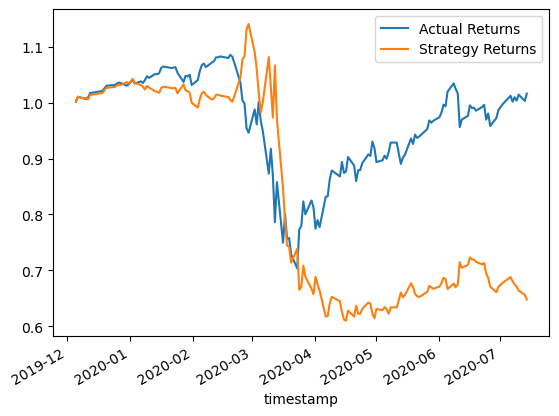

In [16]:
# Plot Strategy Returns to examine performance
(1 + signals_df[['Actual Returns','Strategy Returns']]).cumprod().plot()

In [17]:
# Assign a copy of the sma_fast and sma_slow columns to a features DataFrame called X
X = signals_df[['SMA_Fast', 'SMA_Slow']].shift().dropna().copy()

# Review the DataFrame
X.head()

,SMA_Fast,SMA_Slow
timestamp,,
2019-12-06 05:00:00+00:00,182.3300,175.3343
2019-12-09 05:00:00+00:00,182.7975,175.4293
2019-12-10 05:00:00+00:00,183.4050,175.5120
2019-12-11 05:00:00+00:00,183.6975,175.6035
2019-12-12 05:00:00+00:00,184.0500,175.6959


In [18]:
# Create the target set selecting the Signal column and assiging it to y
y = signals_df['Signal'].copy()

# Review the value counts
y.value_counts()

 1.0    90
-1.0    62
Name: Signal, dtype: int64

In [19]:
# Select the start of the training period
training_begin = X.index.min()

# Display the training begin date
print(training_begin)

2019-12-06 05:00:00+00:00


In [22]:
# Select the ending period for the training data with an offset of 3 months
training_end = X.index.min() + DateOffset(months=3)

# Display the training end date
print(training_end)

2020-03-06 05:00:00+00:00


In [23]:
# Generate the X_train and y_train DataFrames
X_train = X.loc[training_begin:training_end]
y_train = y.loc[training_begin:training_end]

# Review the X_train DataFrame
X_train.head()

,SMA_Fast,SMA_Slow
timestamp,,
2019-12-06 05:00:00+00:00,182.3300,175.3343
2019-12-09 05:00:00+00:00,182.7975,175.4293
2019-12-10 05:00:00+00:00,183.4050,175.5120
2019-12-11 05:00:00+00:00,183.6975,175.6035
2019-12-12 05:00:00+00:00,184.0500,175.6959


In [24]:
# Generate the X_test and y_test DataFrames
X_test = X.loc[training_end:]
y_test = y.loc[training_end:]

# Review the X_test DataFrame
X_test.head()

,SMA_Fast,SMA_Slow
timestamp,,
2020-03-06 05:00:00+00:00,178.7475,185.4480
2020-03-09 04:00:00+00:00,176.9850,185.4466
2020-03-10 04:00:00+00:00,172.9650,185.3084
2020-03-11 04:00:00+00:00,169.1525,185.2340
2020-03-12 04:00:00+00:00,164.6925,185.0759


In [25]:
# Scale the features DataFrames

# Create a StandardScaler instance
scaler = StandardScaler()

# Apply the scaler model to fit the X-train data
X_scaler = scaler.fit(X_train)

# Transform the X_train and X_test DataFrames using the X_scaler
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [26]:
# From SVM, instantiate SVC classifier model instance
svm_model = svm.SVC()
 
# Fit the model to the data using the training data
svm_model = svm_model.fit(X_train_scaled, y_train)

# Use the testing data to make the model predictions
svm_pred = svm_model.predict(X_test_scaled)

# Review the model's predicted values
# YOUR CODE HERE
svm_pred[:10]

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.])

In [31]:
# Use a classification report to evaluate the model using the predictions and testing data
svm_testing_report = classification_report(y_test, svm_pred, output_dict=True)
#print(len(y_test), len(svm_pred))
# Print the classification report
# YOUR CODE HERE
#print(svm_testing_report)

In [32]:
type(svm_testing_report)

dict

In [33]:
print(svm_testing_report)

{'-1.0': {'precision': 0.4024390243902439, 'recall': 0.8918918918918919, 'f1-score': 0.5546218487394957, 'support': 37}, '1.0': {'precision': 0.5, 'recall': 0.07547169811320754, 'f1-score': 0.13114754098360656, 'support': 53}, 'accuracy': 0.4111111111111111, 'macro avg': {'precision': 0.45121951219512196, 'recall': 0.4836817950025497, 'f1-score': 0.34288469486155115, 'support': 90}, 'weighted avg': {'precision': 0.4598915989159892, 'recall': 0.4111111111111111, 'f1-score': 0.30524253417213876, 'support': 90}}
